In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:
def make_poly_matrix (x, deg=5):
    x=np.asarray(x)
    X=[np.ones(len(x))]
    x1=x.copy()
    for i in np.arange(deg):
        X.append(x1)
        x1=x1*x
        
    X=np.asarray(X).T
    return X

In [3]:
def poly_regression(x_train,y_train,deg=9,alpha=0):
    X=make_poly_matrix(x_train,deg=deg)
    w_hat=np.linalg.pinv(X.T@X+alpha*np.identity(X.shape[1]))@X.T@y_train
    y_hat_train=X@w_hat
    return y_hat_train,w_hat

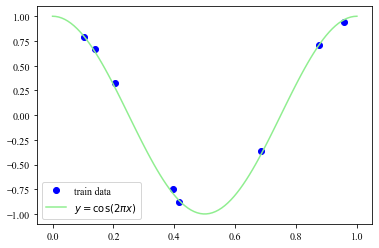

In [4]:
np.random.seed(1)
N = 8
sigma = 0.16
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.cos(2*np.pi*U1)+e1)
    y_test.append(np.cos(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

# make plot
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x_train, y_train, 'o', color='blue', label="train data")
x = np.linspace(0, 1, 100)
ax.plot(x, np.cos(2*np.pi*x), color='lightgreen', label="$y=\cos(2\pi x)$")
ax.legend()


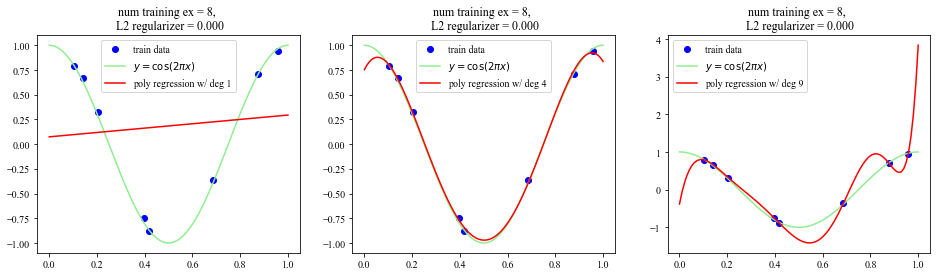

In [5]:
#figure 2
deg_list = [1,4,9]
alpha_list = [0, 0, 0]
fig, ax = plt.subplots(nrows=1, ncols=len(deg_list), figsize=[16, 4])
for i in np.arange(len(deg_list)):
    M = deg_list[i]
    alpha = alpha_list[1]
    y_hat_train, w_hat = poly_regression(x_train, y_train, deg=M, alpha=alpha)
    ax[i].plot(x_train, y_train, 'o', color='blue', label="train data")
    x = np.linspace(0, 1, 100)
    ax[i].plot(x, np.cos(2*np.pi*x), color='lightgreen', label="$y=\cos(2\pi x)$")
    y_poly = make_poly_matrix(x, deg=M) @ w_hat
    ax[i].plot(x, y_poly, color = 'red', label="poly regression w/ deg %i" % M)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha)) 
    ax[i].legend()
    plt.savefig('poly_fitting_ex_n8.png', bbox_inches='tight')

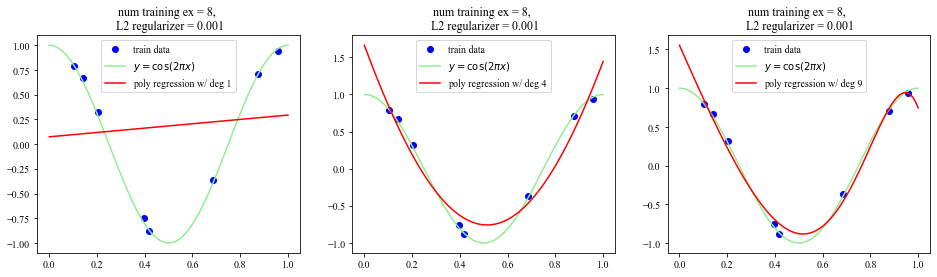

In [6]:
#figure 4
deg_list = [1,4,9]
alpha_list = [0.001, 0.001, 0.001]
fig, ax = plt.subplots(nrows=1, ncols=len(deg_list), figsize=[16, 4])
for i in np.arange(len(deg_list)):
    M = deg_list[i]
    alpha = alpha_list[1]
    y_hat_train, w_hat = poly_regression(x_train, y_train, deg=M, alpha=alpha)
    ax[i].plot(x_train, y_train, 'o', color='blue', label="train data")
    x = np.linspace(0, 1, 100)
    ax[i].plot(x, np.cos(2*np.pi*x), color='lightgreen', label="$y=\cos(2\pi x)$")
    y_poly = make_poly_matrix(x, deg=M) @ w_hat
    ax[i].plot(x, y_poly, color = 'red', label="poly regression w/ deg %i" % M)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha)) 
    ax[i].legend()
    plt.savefig('poly_fitting_ex_n8_alpha.png', bbox_inches='tight')

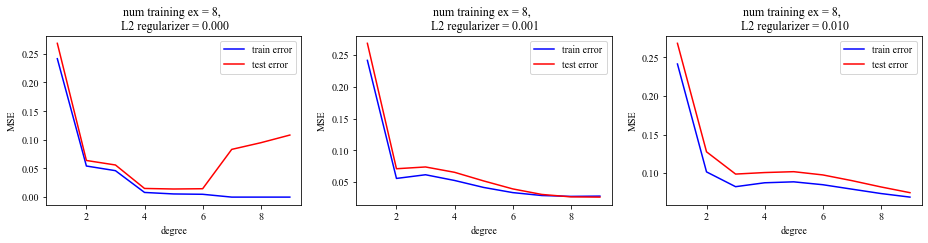

In [7]:
#figure 5
deg_list = np.arange(1,10)
alpha_list = [0, 0.001,0.01]
error_train_mx = np.zeros(shape=[len(deg_list), len(alpha_list)])
error_test_mx = np.zeros(shape=[len(deg_list), len(alpha_list)])

for i in np.arange(len(deg_list)):
    for j in np.arange(len(alpha_list)):
        y_hat_train, w_hat = poly_regression(x_train, y_train, deg=deg_list[i], alpha=alpha_list[j])
        y_hat_test = make_poly_matrix(x_test, deg=deg_list[i]) @ w_hat
        error_train_mx[i, j] = np.linalg.norm(y_train-y_hat_train, 2)/N
        error_test_mx[i, j] = np.linalg.norm(y_test-y_hat_test, 2)/N



ncols = 3
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=[13,4])
for i in np.arange(ncols):
    ax[i].plot(deg_list, error_train_mx[:,i], color='blue', label="train error")
    ax[i].plot(deg_list, error_test_mx[:,i], color='red', label="test error")
    ax[i].set_xlabel('degree', fontsize=10)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha_list[i])) 
    ax[i].set_ylabel('MSE', fontsize=10)
    ax[i].legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('poly_error_ex_n8.png')

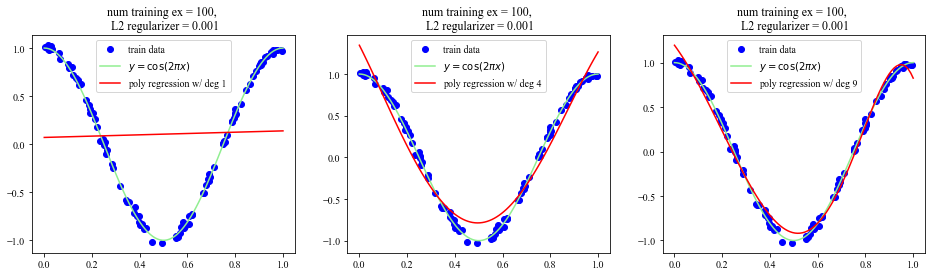

In [8]:
#figure 3
np.random.seed(1)
N = 100
sigma = 0.16
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.cos(2*np.pi*U1)+e1)
    y_test.append(np.cos(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

deg_list = [1,4,9]
alpha_list = [0, 0.001, 0.01, 0.1]
fig, ax = plt.subplots(nrows=1, ncols=len(deg_list), figsize=[16, 4])
for i in np.arange(len(deg_list)):
    M = deg_list[i]
    alpha = alpha_list[1]
    y_hat_train, w_hat = poly_regression(x_train, y_train, deg=M, alpha=alpha)
    ax[i].plot(x_train, y_train, 'o', color='blue', label="train data")
    x = np.linspace(0, 1, 100)
    ax[i].plot(x, np.cos(2*np.pi*x), color='lightgreen', label="$y=\cos(2\pi x)$")
    y_poly = make_poly_matrix(x, deg=M) @ w_hat
    ax[i].plot(x, y_poly, color = 'red', label="poly regression w/ deg %i" % M)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha)) 
    ax[i].legend()
    plt.savefig('poly_fitting_ex_n100.png', bbox_inches='tight')

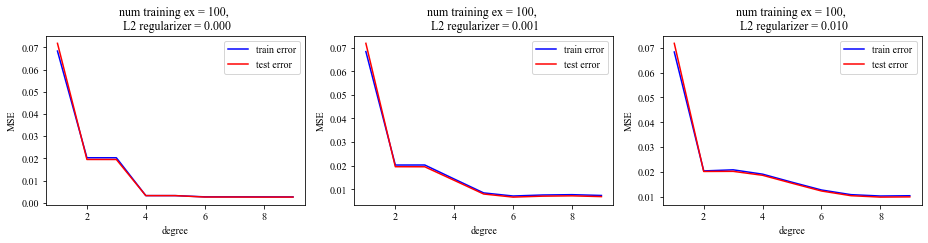

In [9]:
#figure 6
deg_list = np.arange(1,10)
alpha_list = [0, 0.001,0.01]
error_train_mx = np.zeros(shape=[len(deg_list), len(alpha_list)])
error_test_mx = np.zeros(shape=[len(deg_list), len(alpha_list)])

for i in np.arange(len(deg_list)):
    for j in np.arange(len(alpha_list)):
        y_hat_train, w_hat = poly_regression(x_train, y_train, deg=deg_list[i], alpha=alpha_list[j])
        y_hat_test = make_poly_matrix(x_test, deg=deg_list[i]) @ w_hat
        error_train_mx[i, j] = np.linalg.norm(y_train-y_hat_train, 2)/N
        error_test_mx[i, j] = np.linalg.norm(y_test-y_hat_test, 2)/N



ncols = 3
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=[13,4])
for i in np.arange(ncols):
    ax[i].plot(deg_list, error_train_mx[:,i], color='blue', label="train error")
    ax[i].plot(deg_list, error_test_mx[:,i], color='red', label="test error")
    ax[i].set_xlabel('degree', fontsize=10)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha_list[i])) 
    ax[i].set_ylabel('MSE', fontsize=10)
    ax[i].legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('poly_error_ex_n100_alpha.png')

In [10]:
def uniform(a,b):
    return a+(b-a)*np.random.rand()

In [11]:
def make_poly (x, deg=5):
    x=np.asarray(x)
    X=[1]
    x1=x.copy()
    for i in np.arange(deg):
        X.append(x1)
        x1=x1*x
        
    X=np.asarray(X).T
    return X

In [12]:
def poly_regression_ML(x_train,y_train,deg=9):
    y_hat_train,w_hat=poly_regression(x_train,y_train,deg=deg,alpha=0)
    var_hat = (1/len(x_train))*np.linalg.norm(y_train-y_hat_train,2)**2
    return w_hat,var_hat

In [13]:
def bayesian_poly_regression(x_train, y_train, x, deg=9, tau=0.1, sigma=0.1):
    x_vec = make_poly_matrix([x], deg=deg).T
    X = make_poly_matrix(x_train, deg=deg)
    X1 = []
    for i in np.arange(X.shape[0]):
        X1.append(np.outer(X[i,:], x_vec))
    X1 = sum(X1)
    S1 = tau**(-2) * np.identity(deg+1) + sigma**(-2) * X1
    S = np.linalg.pinv(S1)
    mean = sigma**(-2) * x_vec.T @ S @ X.T @ y_train
    var = sigma**2 + x_vec.T @ S @ x_vec
    return mean[0], var[0,0]

In [14]:
#Generate trails
np.random.seed(7)
N = 100
sigma = 0.16
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.cos(2*np.pi*U1)+e1)
    y_test.append(np.cos(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

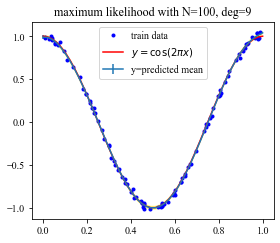

In [15]:
#ML Q4
deg=9
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])
x = np.linspace(0,1)
y = np.cos(2*np.pi*x)

y_mean_predict = []
y_std_predict = []


for i in np.arange(len(x)):
    w_hat, y_var_predict = poly_regression_ML(x_train, y_train, deg=deg)
    mu=make_poly(x[i],deg=deg) @w_hat
    y_mean_predict.append(mu)
    
y_mean_predict = np.asarray(y_mean_predict)
y_std_predict = math.sqrt(y_var_predict)

markers, caps, bars = ax.errorbar(x, y_mean_predict, yerr=y_std_predict, fmt='', marker=None, label="y=predicted mean", errorevery=100)
ax.fill_between(x, y_mean_predict - y_std_predict, y_mean_predict + y_std_predict, facecolor='yellow', alpha=0.5)
ax.plot(x_train, y_train, '.', color='blue', label="train data")
ax.plot(x, y, color='red', label="$y=\cos(2\pi x)$")
ax.title.set_text("maximum likelihood with N=100, deg=9") 
ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('Q4ML.png')

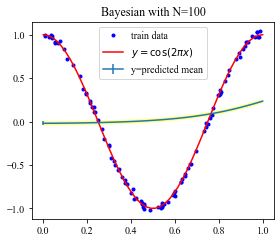

In [16]:
#Bayesian Q4
deg=9
tau=0.1
sigma=0.4

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])
x = np.linspace(0,1)
y = np.cos(2*np.pi*x)

y_mean_predict = []
y_std_predict = []


for i in np.arange(len(x)):
    mean,var = bayesian_poly_regression(x_train, y_train, x=x[i], deg=9, tau=10, sigma=sigma)
    y_mean_predict.append(mean)
    y_std_predict.append(np.sqrt(var))
    
y_mean_predict = np.asarray(y_mean_predict)
y_std_predict = math.sqrt(y_var_predict)

markers, caps, bars = ax.errorbar(x, y_mean_predict, yerr=y_std_predict, fmt='', marker=None, label="y=predicted mean", errorevery=100)
ax.fill_between(x, y_mean_predict - y_std_predict, y_mean_predict + y_std_predict, facecolor='yellow', alpha=0.5)
ax.plot(x_train, y_train, '.', color='blue', label="train data")
ax.plot(x, y, color='red', label="$y=\cos(2\pi x)$")
ax.title.set_text("Bayesian with N=100") 
ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('Q4BAY.png')

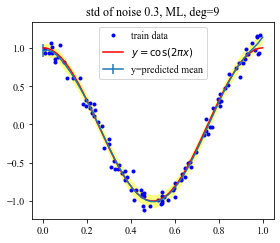

In [17]:
#Q5 figure 8

np.random.seed(7)
N = 100
sigma = 0.3
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.cos(2*np.pi*U1)+e1)
    y_test.append(np.cos(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

deg=9
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])
x = np.linspace(0,1)
y = np.cos(2*np.pi*x)

y_mean_predict = []
y_std_predict = []


for i in np.arange(len(x)):
    w_hat, y_var_predict = poly_regression_ML(x_train, y_train, deg=deg)
    mu=make_poly(x[i],deg=deg) @w_hat
    y_mean_predict.append(mu)
    
y_mean_predict = np.asarray(y_mean_predict)
y_std_predict = math.sqrt(y_var_predict)

markers, caps, bars = ax.errorbar(x, y_mean_predict, yerr=y_std_predict, fmt='', marker=None, label="y=predicted mean", errorevery=100)
ax.fill_between(x, y_mean_predict - y_std_predict, y_mean_predict + y_std_predict, facecolor='yellow', alpha=0.5)
ax.plot(x_train, y_train, '.', color='blue', label="train data")
ax.plot(x, y, color='red', label="$y=\cos(2\pi x)$")
ax.title.set_text("std of noise 0.3, ML, deg=9") 
ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('ML_std03.png')

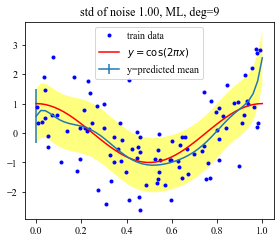

In [18]:
#Q5 figure 8-2

np.random.seed(7)
N = 100
sigma = 1
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.cos(2*np.pi*U1)+e1)
    y_test.append(np.cos(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

deg=9
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])
x = np.linspace(0,1)
y = np.cos(2*np.pi*x)

y_mean_predict = []
y_std_predict = []


for i in np.arange(len(x)):
    w_hat, y_var_predict = poly_regression_ML(x_train, y_train, deg=deg)
    mu=make_poly(x[i],deg=deg) @w_hat
    y_mean_predict.append(mu)
    
y_mean_predict = np.asarray(y_mean_predict)
y_std_predict = math.sqrt(y_var_predict)

markers, caps, bars = ax.errorbar(x, y_mean_predict, yerr=y_std_predict, fmt='', marker=None, label="y=predicted mean", errorevery=100)
ax.fill_between(x, y_mean_predict - y_std_predict, y_mean_predict + y_std_predict, facecolor='yellow', alpha=0.5)
ax.plot(x_train, y_train, '.', color='blue', label="train data")
ax.plot(x, y, color='red', label="$y=\cos(2\pi x)$")
ax.title.set_text("std of noise 1.00, ML, deg=9") 
ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('ML_std10.png')

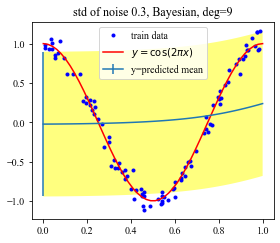

In [19]:
#figure 9-1
np.random.seed(7)
N = 100
sigma = 0.3
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.cos(2*np.pi*U1)+e1)
    y_test.append(np.cos(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

deg=9
tau=0.1
sigma=0.1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])
x = np.linspace(0,1)
y = np.cos(2*np.pi*x)

y_mean_predict = []
y_std_predict = []


for i in np.arange(len(x)):
    mean,var = bayesian_poly_regression(x_train, y_train, x=x[i], deg=9, tau=tau, sigma=sigma)
    y_mean_predict.append(mean)
    y_std_predict.append(np.sqrt(var))
    
y_mean_predict = np.asarray(y_mean_predict)
y_std_predict = math.sqrt(y_var_predict)

markers, caps, bars = ax.errorbar(x, y_mean_predict, yerr=y_std_predict, fmt='', marker=None, label="y=predicted mean", errorevery=100)
ax.fill_between(x, y_mean_predict - y_std_predict, y_mean_predict + y_std_predict, facecolor='yellow', alpha=0.5)
ax.plot(x_train, y_train, '.', color='blue', label="train data")
ax.plot(x, y, color='red', label="$y=\cos(2\pi x)$")
ax.title.set_text("std of noise 0.3, Bayesian, deg=9") 
ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('Bay_std03.png')

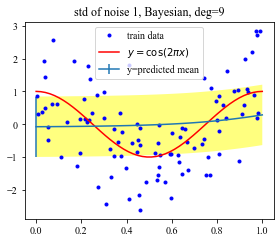

In [20]:
#figure 9-1
np.random.seed(7)
N = 100
sigma = 1
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.cos(2*np.pi*U1)+e1)
    y_test.append(np.cos(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

deg=9
tau=10
sigma=0.1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])
x = np.linspace(0,1)
y = np.cos(2*np.pi*x)

y_mean_predict = []
y_std_predict = []


for i in np.arange(len(x)):
    mean,var = bayesian_poly_regression(x_train, y_train, x=x[i], deg=9, tau=0.1, sigma=0.1)
    y_mean_predict.append(mean)
    y_std_predict.append(np.sqrt(var))
    
y_mean_predict = np.asarray(y_mean_predict)
y_std_predict = math.sqrt(y_var_predict)

markers, caps, bars = ax.errorbar(x, y_mean_predict, yerr=y_std_predict, fmt='', marker=None, label="y=predicted mean", errorevery=100)
ax.fill_between(x, y_mean_predict - y_std_predict, y_mean_predict + y_std_predict, facecolor='yellow', alpha=0.5)
ax.plot(x_train, y_train, '.', color='blue', label="train data")
ax.plot(x, y, color='red', label="$y=\cos(2\pi x)$")
ax.title.set_text("std of noise 1, Bayesian, deg=9") 
ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('Bay_std10.png')